In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

plt.rcParams['figure.dpi'] = 300
sns.set_theme(font_scale = 0.75)
sns.set_style('whitegrid')


autos = pd.read_csv('./data/autos.csv')

In [2]:
autos['make_encoded'] = autos.groupby('make')['price'].transform('mean')

autos[['make', 'price', 'make_encoded']].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


In [4]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./data/movielens1m.csv')
df = df.astype(np.uint8, errors = 'ignore')
df

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,b'4508',25,1,21,b'15701',4
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,b'4167',25,1,21,b'22032',1
1000206,b'593',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'5799',25,1,3,b'80916',5
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3224',25,0,14,b'93428',3


In [6]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac = 0.25)
y_encode = y[X_encode.index]

X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [12]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols = ['Zipcode'], m = 5.0)
encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain)
X_train

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.817309
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,2.970473
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.431471
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,3.612393
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,3.788388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,b'2915',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3792',25,1,4,3.550816
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'4508',25,1,21,3.280754
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,3.777342
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,3.850974


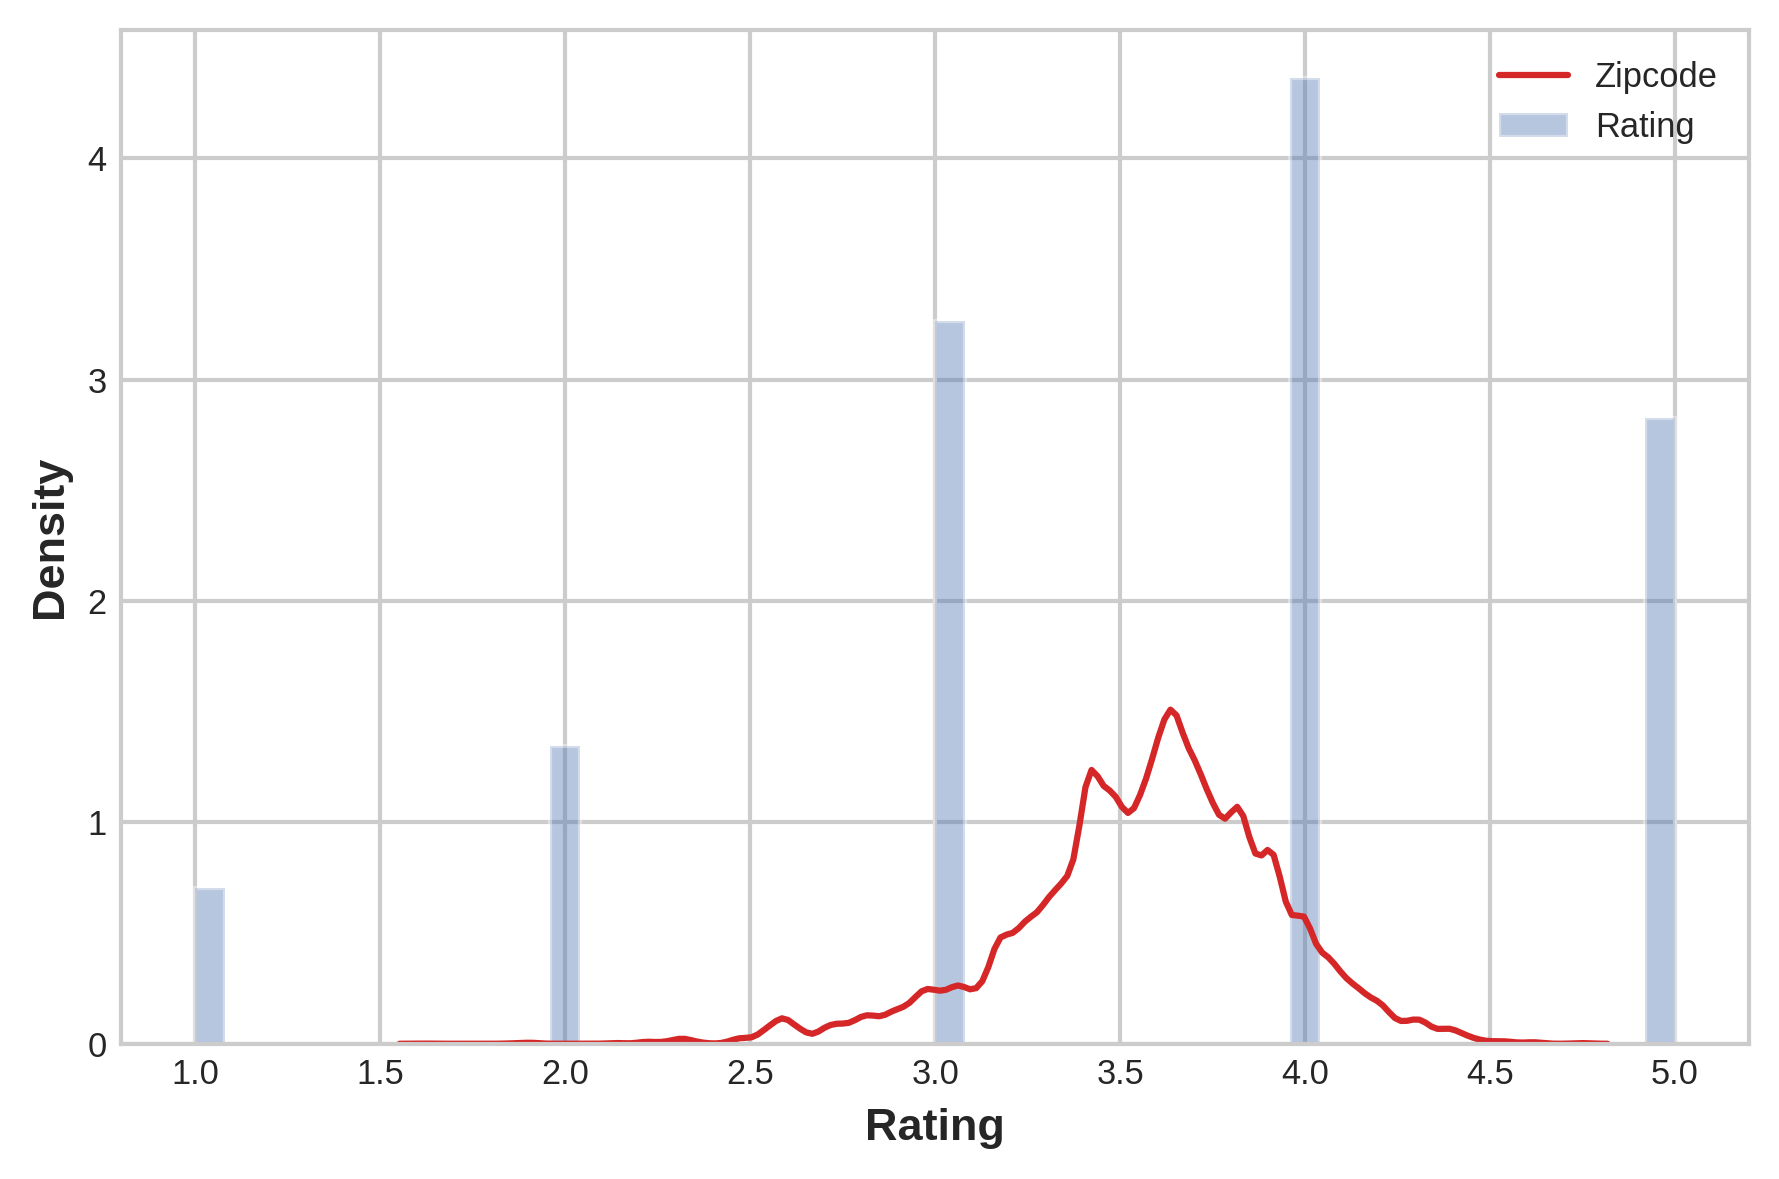

In [11]:
ax = sns.distplot(y, kde = False, norm_hist = True)
sns.kdeplot(X_train['Zipcode'], color = 'tab:red', ax = ax)

ax.set_xlabel('Rating')
ax.legend(labels = ['Zipcode', 'Rating'])

In [13]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


def score_dataset(X, y, model = XGBRegressor()):
    for colname in X.select_dtypes(['category', 'object']):
        X[colname], _ = X[colname].factorize()
        
    score = cross_val_score(
        model, X, y, cv = 5, scoring = 'neg_mean_squared_log_error',
    )
    
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


df = pd.read_csv('./data/ames.csv')

In [15]:
df.select_dtypes(['object']).nunique().sort_values(ascending = False)

Neighborhood     28
Exterior2nd      17
MSSubClass       16
Exterior1st      16
OverallQual      10
SaleType         10
Condition1        9
OverallCond       9
Condition2        8
HouseStyle        8
Functional        8
RoofMatl          8
BsmtFinType2      7
MSZoning          7
GarageType        7
BsmtFinType1      7
RoofStyle         6
Foundation        6
BsmtCond          6
BsmtQual          6
SaleCondition     6
GarageQual        6
MiscFeature       6
Electrical        6
Heating           6
FireplaceQu       6
GarageCond        6
BsmtExposure      5
LotConfig         5
Fence             5
PoolQC            5
BldgType          5
KitchenQual       5
MasVnrType        5
HeatingQC         5
ExterCond         5
GarageFinish      4
ExterQual         4
LandContour       4
LotShape          4
PavedDrive        3
LandSlope         3
Utilities         3
Alley             3
CentralAir        2
Street            2
dtype: int64

In [19]:
category = 'Exterior2nd'

df[category].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
PreCast       1
Name: Exterior2nd, dtype: int64

In [20]:
X_encode = df.sample(frac = 0.20, random_state = 0)
y_encode = X_encode.pop('SalePrice')

X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop('SalePrice')

In [23]:
encoder = MEstimateEncoder(
    cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass'],
    m = 5.0,
)

encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain, y_train)
encoder.cols

['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass']

Text(0.5, 0, 'SalePrice')

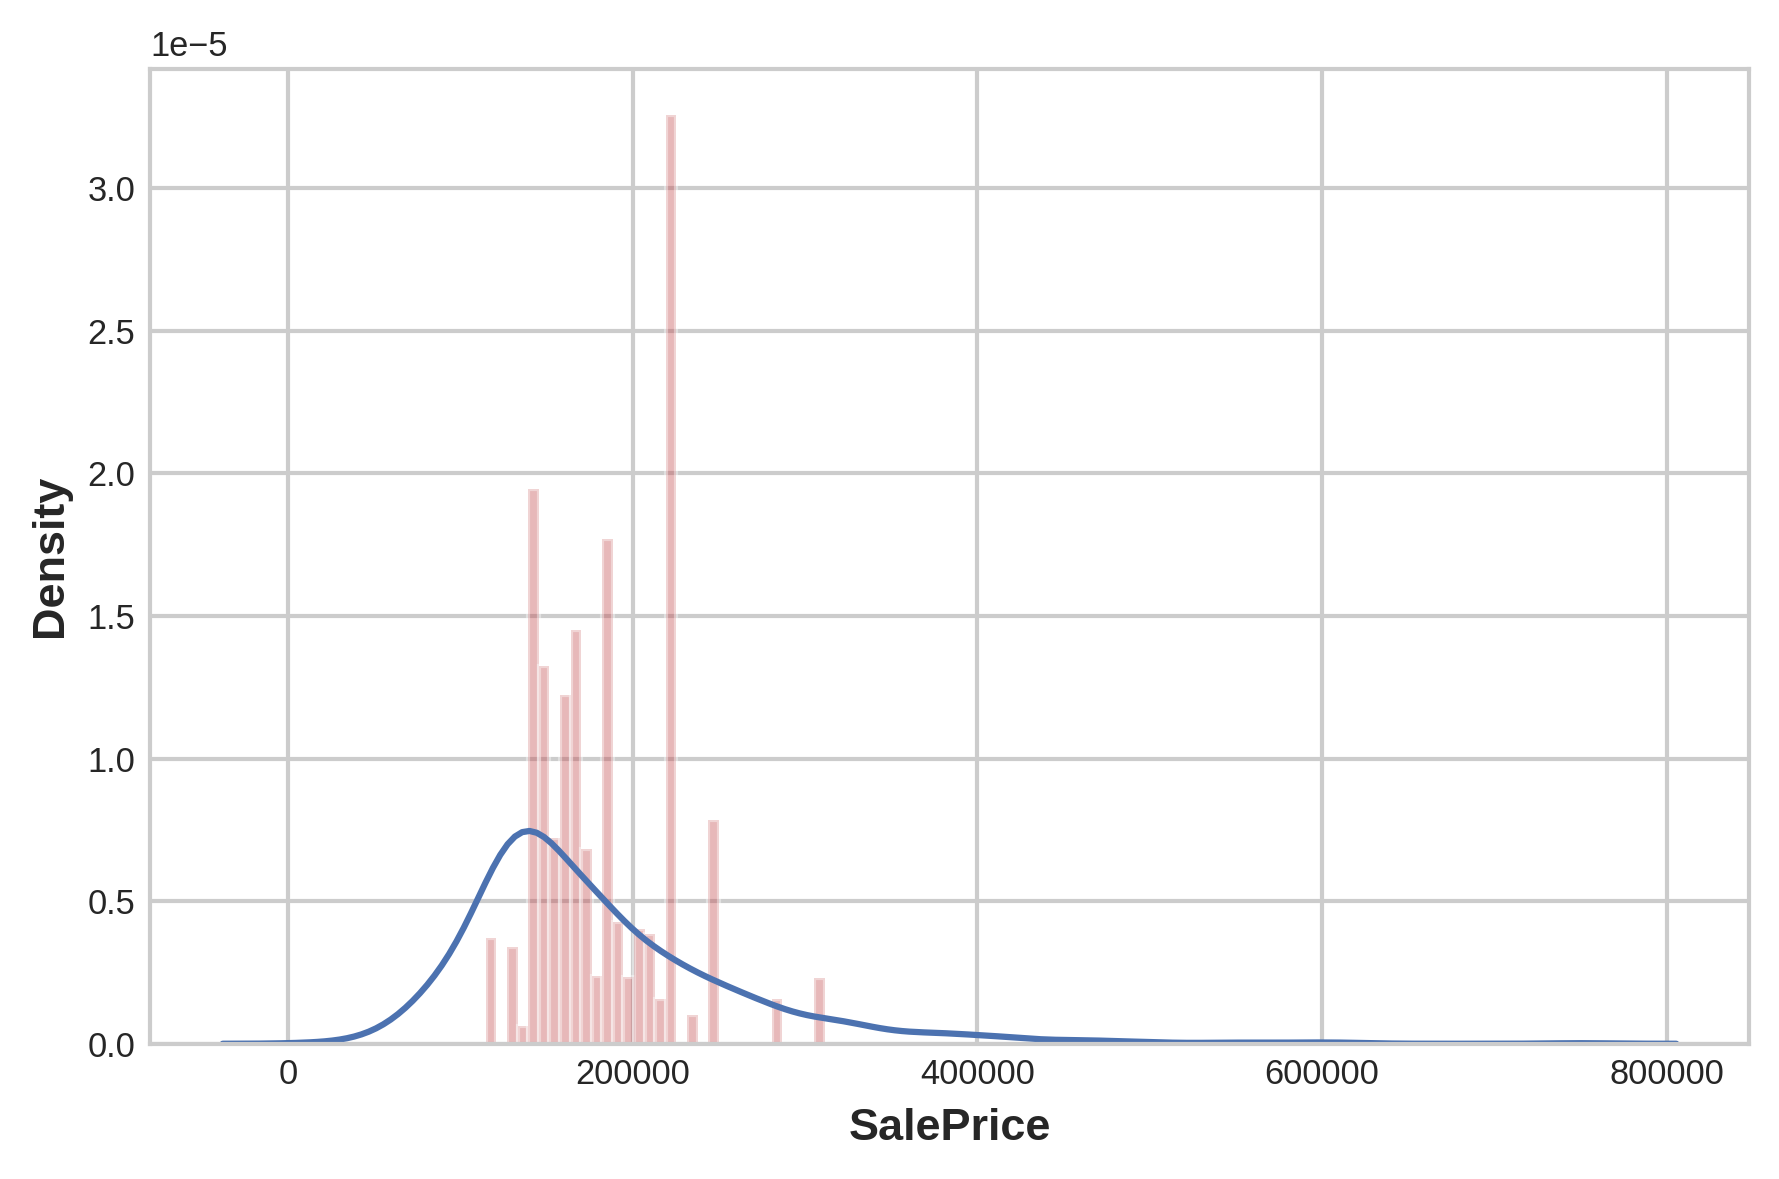

In [24]:
feature = encoder.cols

ax = sns.distplot(y_train, kde = True, hist = False)
sns.distplot(X_train[feature], color = 'r', ax = ax, hist = True, kde = False, norm_hist = True)
ax.set_xlabel('SalePrice')

In [25]:
# overfitting?

m = 0.0

X = df.copy()
y = X.pop('SalePrice')

X['Count'] = range(len(X))
X['Count'][1] = 0

encoder = MEstimateEncoder(cols = 'Count', m = m)
X = encoder.fit_transform(X, y)

score = score_dataset(X, y)
score

0.029263677658934804

Text(0.5, 0, 'Sale Price')

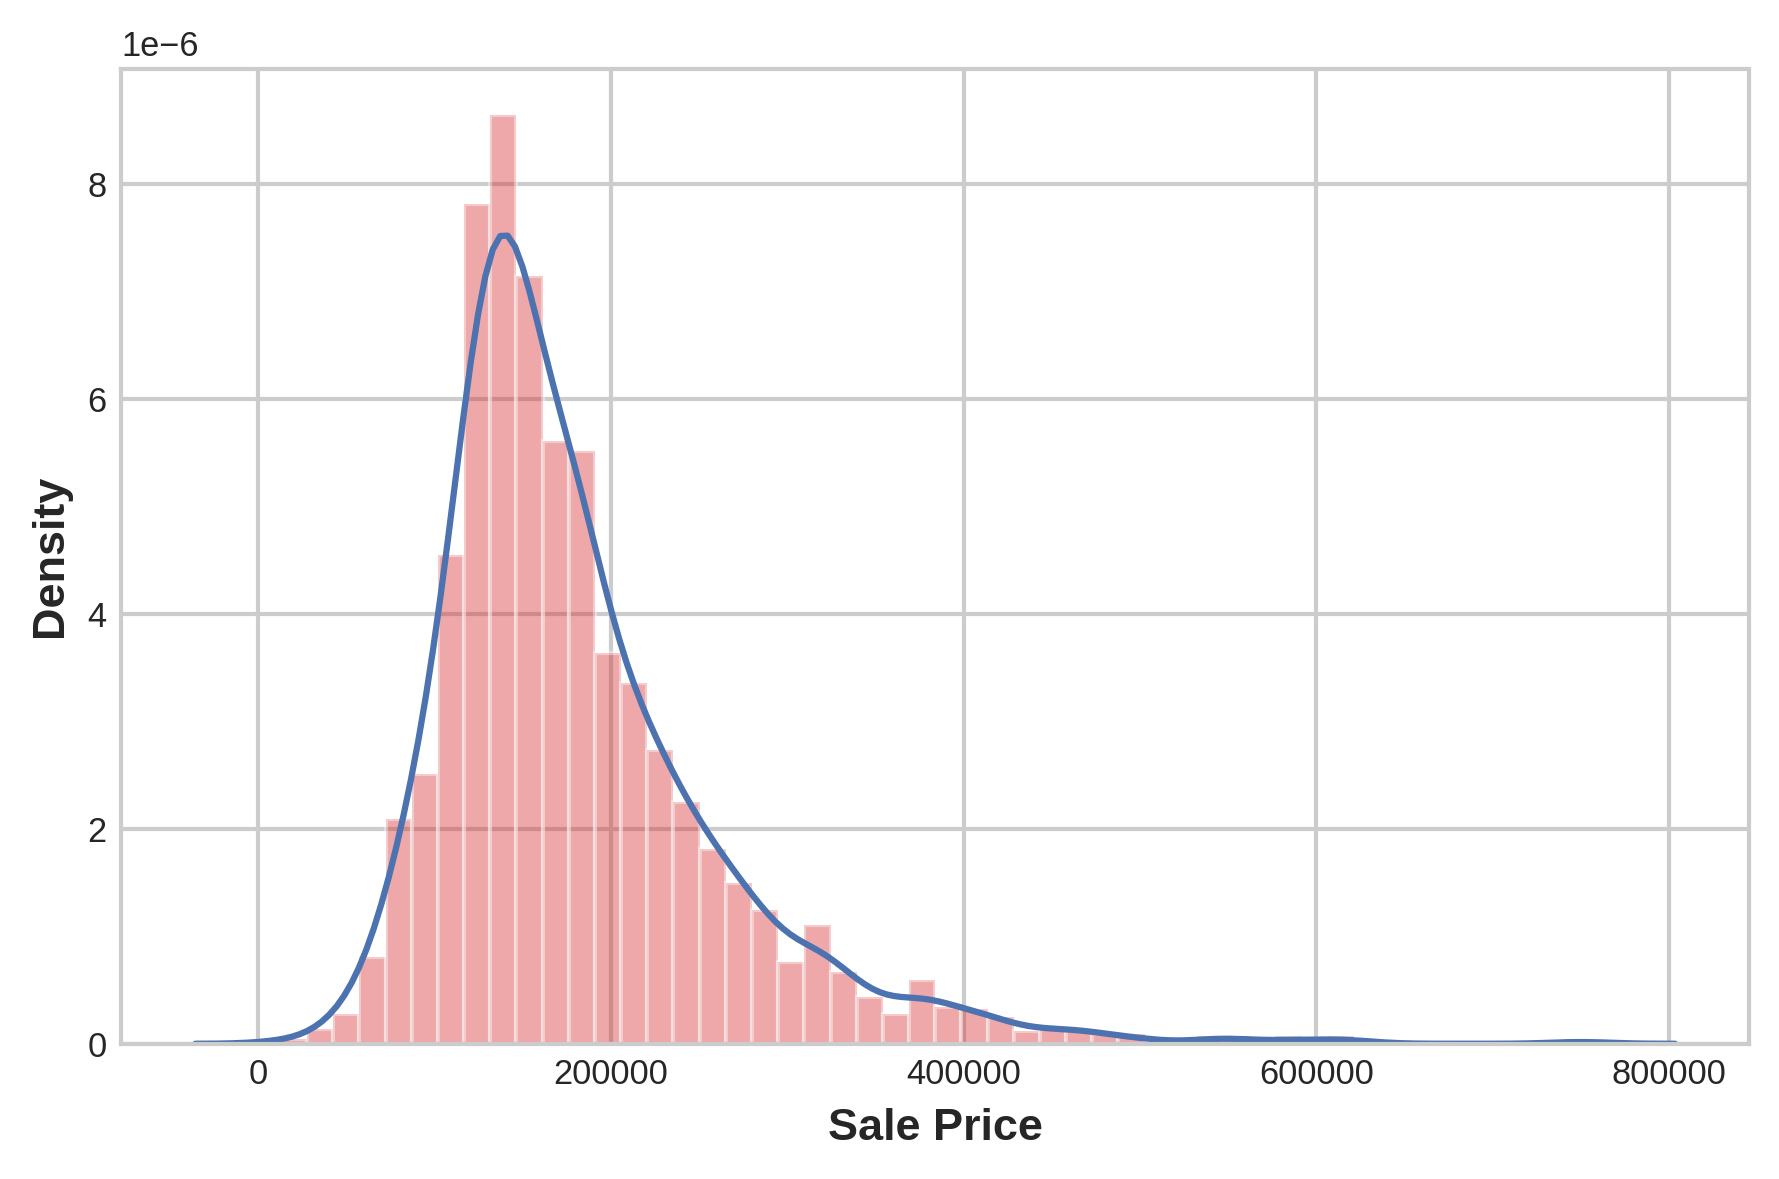

In [27]:
ax = sns.distplot(y, kde = True, hist = False)
sns.distplot(X['Count'], color = 'tab:red', ax = ax, hist = True, kde = False, norm_hist = True)
ax.set_xlabel('Sale Price')